# Practice Project - 1
World Happiness Report

In [1]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats.mstats import normaltest
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
happiness = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
happiness.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
happiness.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [5]:
#renamed column names as few names have space in them.
happiness.rename(columns = {'Happiness Score':'Happiness_Score',
                            'Happiness Rank':'Happiness_Rank',
                            'Happiness Score':'Happiness_Score',
                            'Standard Error':'Standard_Error', 
                            'Economy (GDP per Capita)':'Economy(GDP_per_Capita)', 
                            'Health (Life Expectancy)':'Health(Life_Expectancy)',
                             'Trust (Government Corruption)':'Trust(Government_Corruption)',
                             'Dystopia Residual':'Dystopia_Residual'}, inplace = True)
happiness.head(5)

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Economy(GDP_per_Capita),Family,Health(Life_Expectancy),Freedom,Trust(Government_Corruption),Generosity,Dystopia_Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [6]:
len(happiness)

158

In [7]:
# To check number of non null values in the dataset
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       158 non-null    object 
 1   Region                        158 non-null    object 
 2   Happiness_Rank                158 non-null    int64  
 3   Happiness_Score               158 non-null    float64
 4   Standard_Error                158 non-null    float64
 5   Economy(GDP_per_Capita)       158 non-null    float64
 6   Family                        158 non-null    float64
 7   Health(Life_Expectancy)       158 non-null    float64
 8   Freedom                       158 non-null    float64
 9   Trust(Government_Corruption)  158 non-null    float64
 10  Generosity                    158 non-null    float64
 11  Dystopia_Residual             158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [8]:
# To check null values
happiness.isnull().sum()

Country                         0
Region                          0
Happiness_Rank                  0
Happiness_Score                 0
Standard_Error                  0
Economy(GDP_per_Capita)         0
Family                          0
Health(Life_Expectancy)         0
Freedom                         0
Trust(Government_Corruption)    0
Generosity                      0
Dystopia_Residual               0
dtype: int64

In [9]:
happiness.describe()

,Happiness_Rank,Happiness_Score,Standard_Error,Economy(GDP_per_Capita),Family,Health(Life_Expectancy),Freedom,Trust(Government_Corruption),Generosity,Dystopia_Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Data visuialization

<Figure size 1440x1440 with 0 Axes>

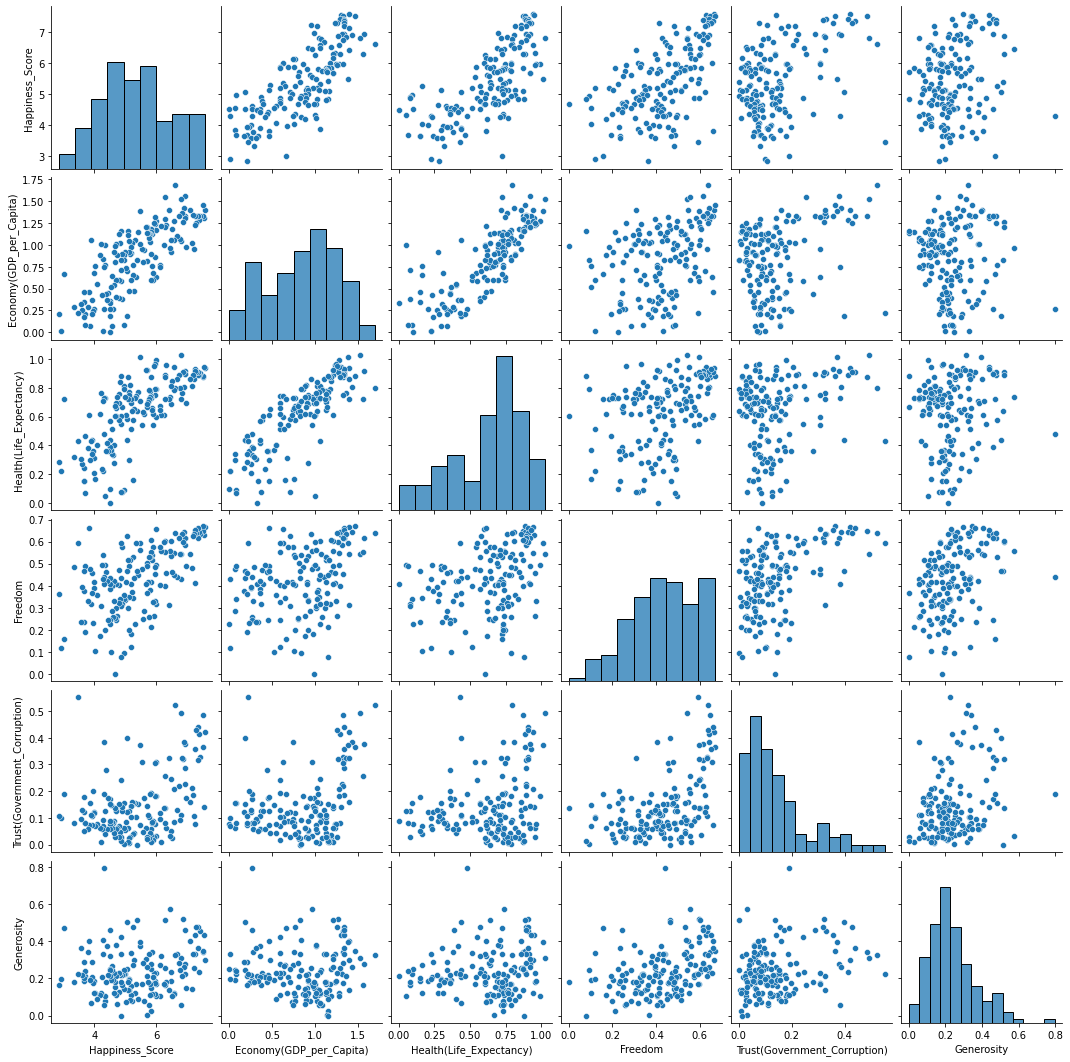

In [10]:
fig = plt.figure(figsize = (20,20))
sns.pairplot(happiness[['Happiness_Score','Economy(GDP_per_Capita)','Health(Life_Expectancy)','Freedom','Trust(Government_Corruption)','Generosity']])

1.Plot shows positive corelation between GDP and happiness score

2.Happiness score and life expectence is also in positive corelation,if people are getting good health care they are generally happy.

3.Except for generosity all other attributes are showing positive corelation to happiness score.

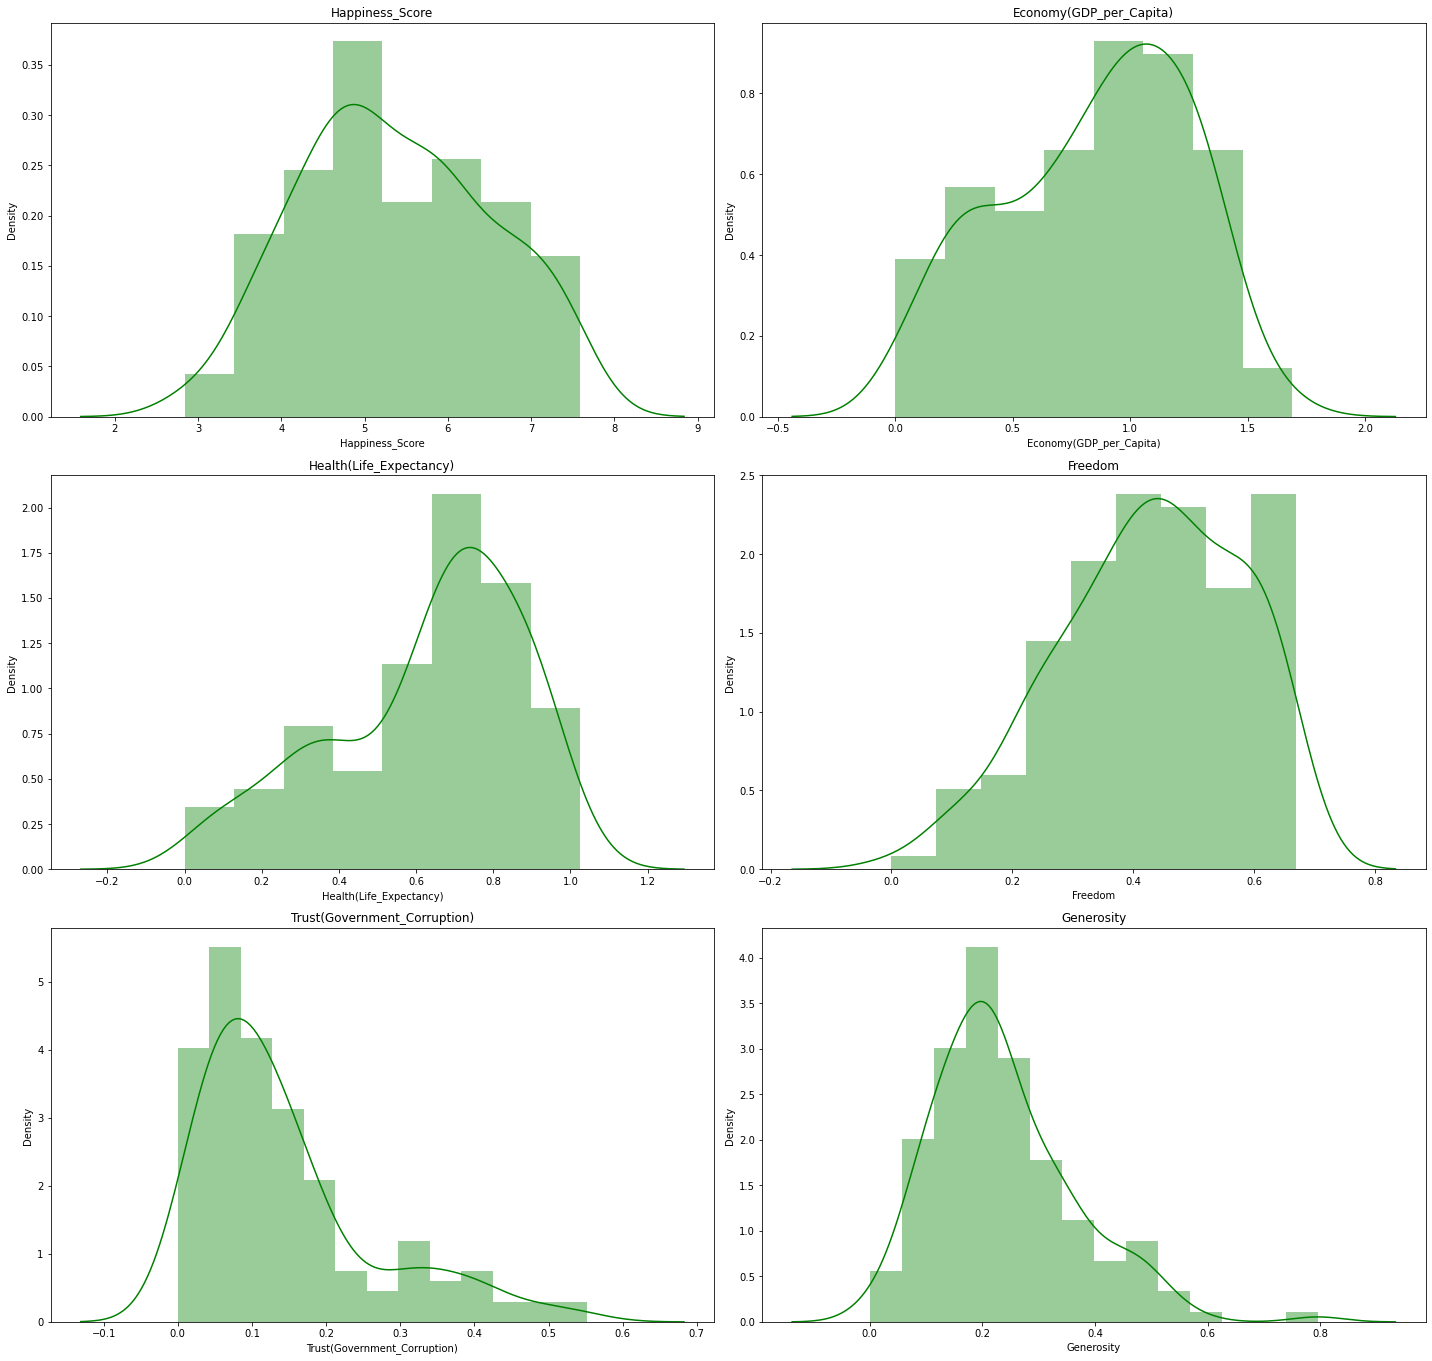

In [11]:
columns = ['Happiness_Score','Economy(GDP_per_Capita)','Health(Life_Expectancy)','Freedom','Trust(Government_Corruption)','Generosity']
plt.figure(figsize = (20,50))
for i in range(len(columns)):
    plt.subplot(8,2, i+1)
    sns.distplot(happiness[columns[i]],color = 'g');
    plt.title(columns[i])
plt.tight_layout()

Happiness score and economy are almost normally distributed whereas health and freedom are left skewed and trust and generosity are right skewed.

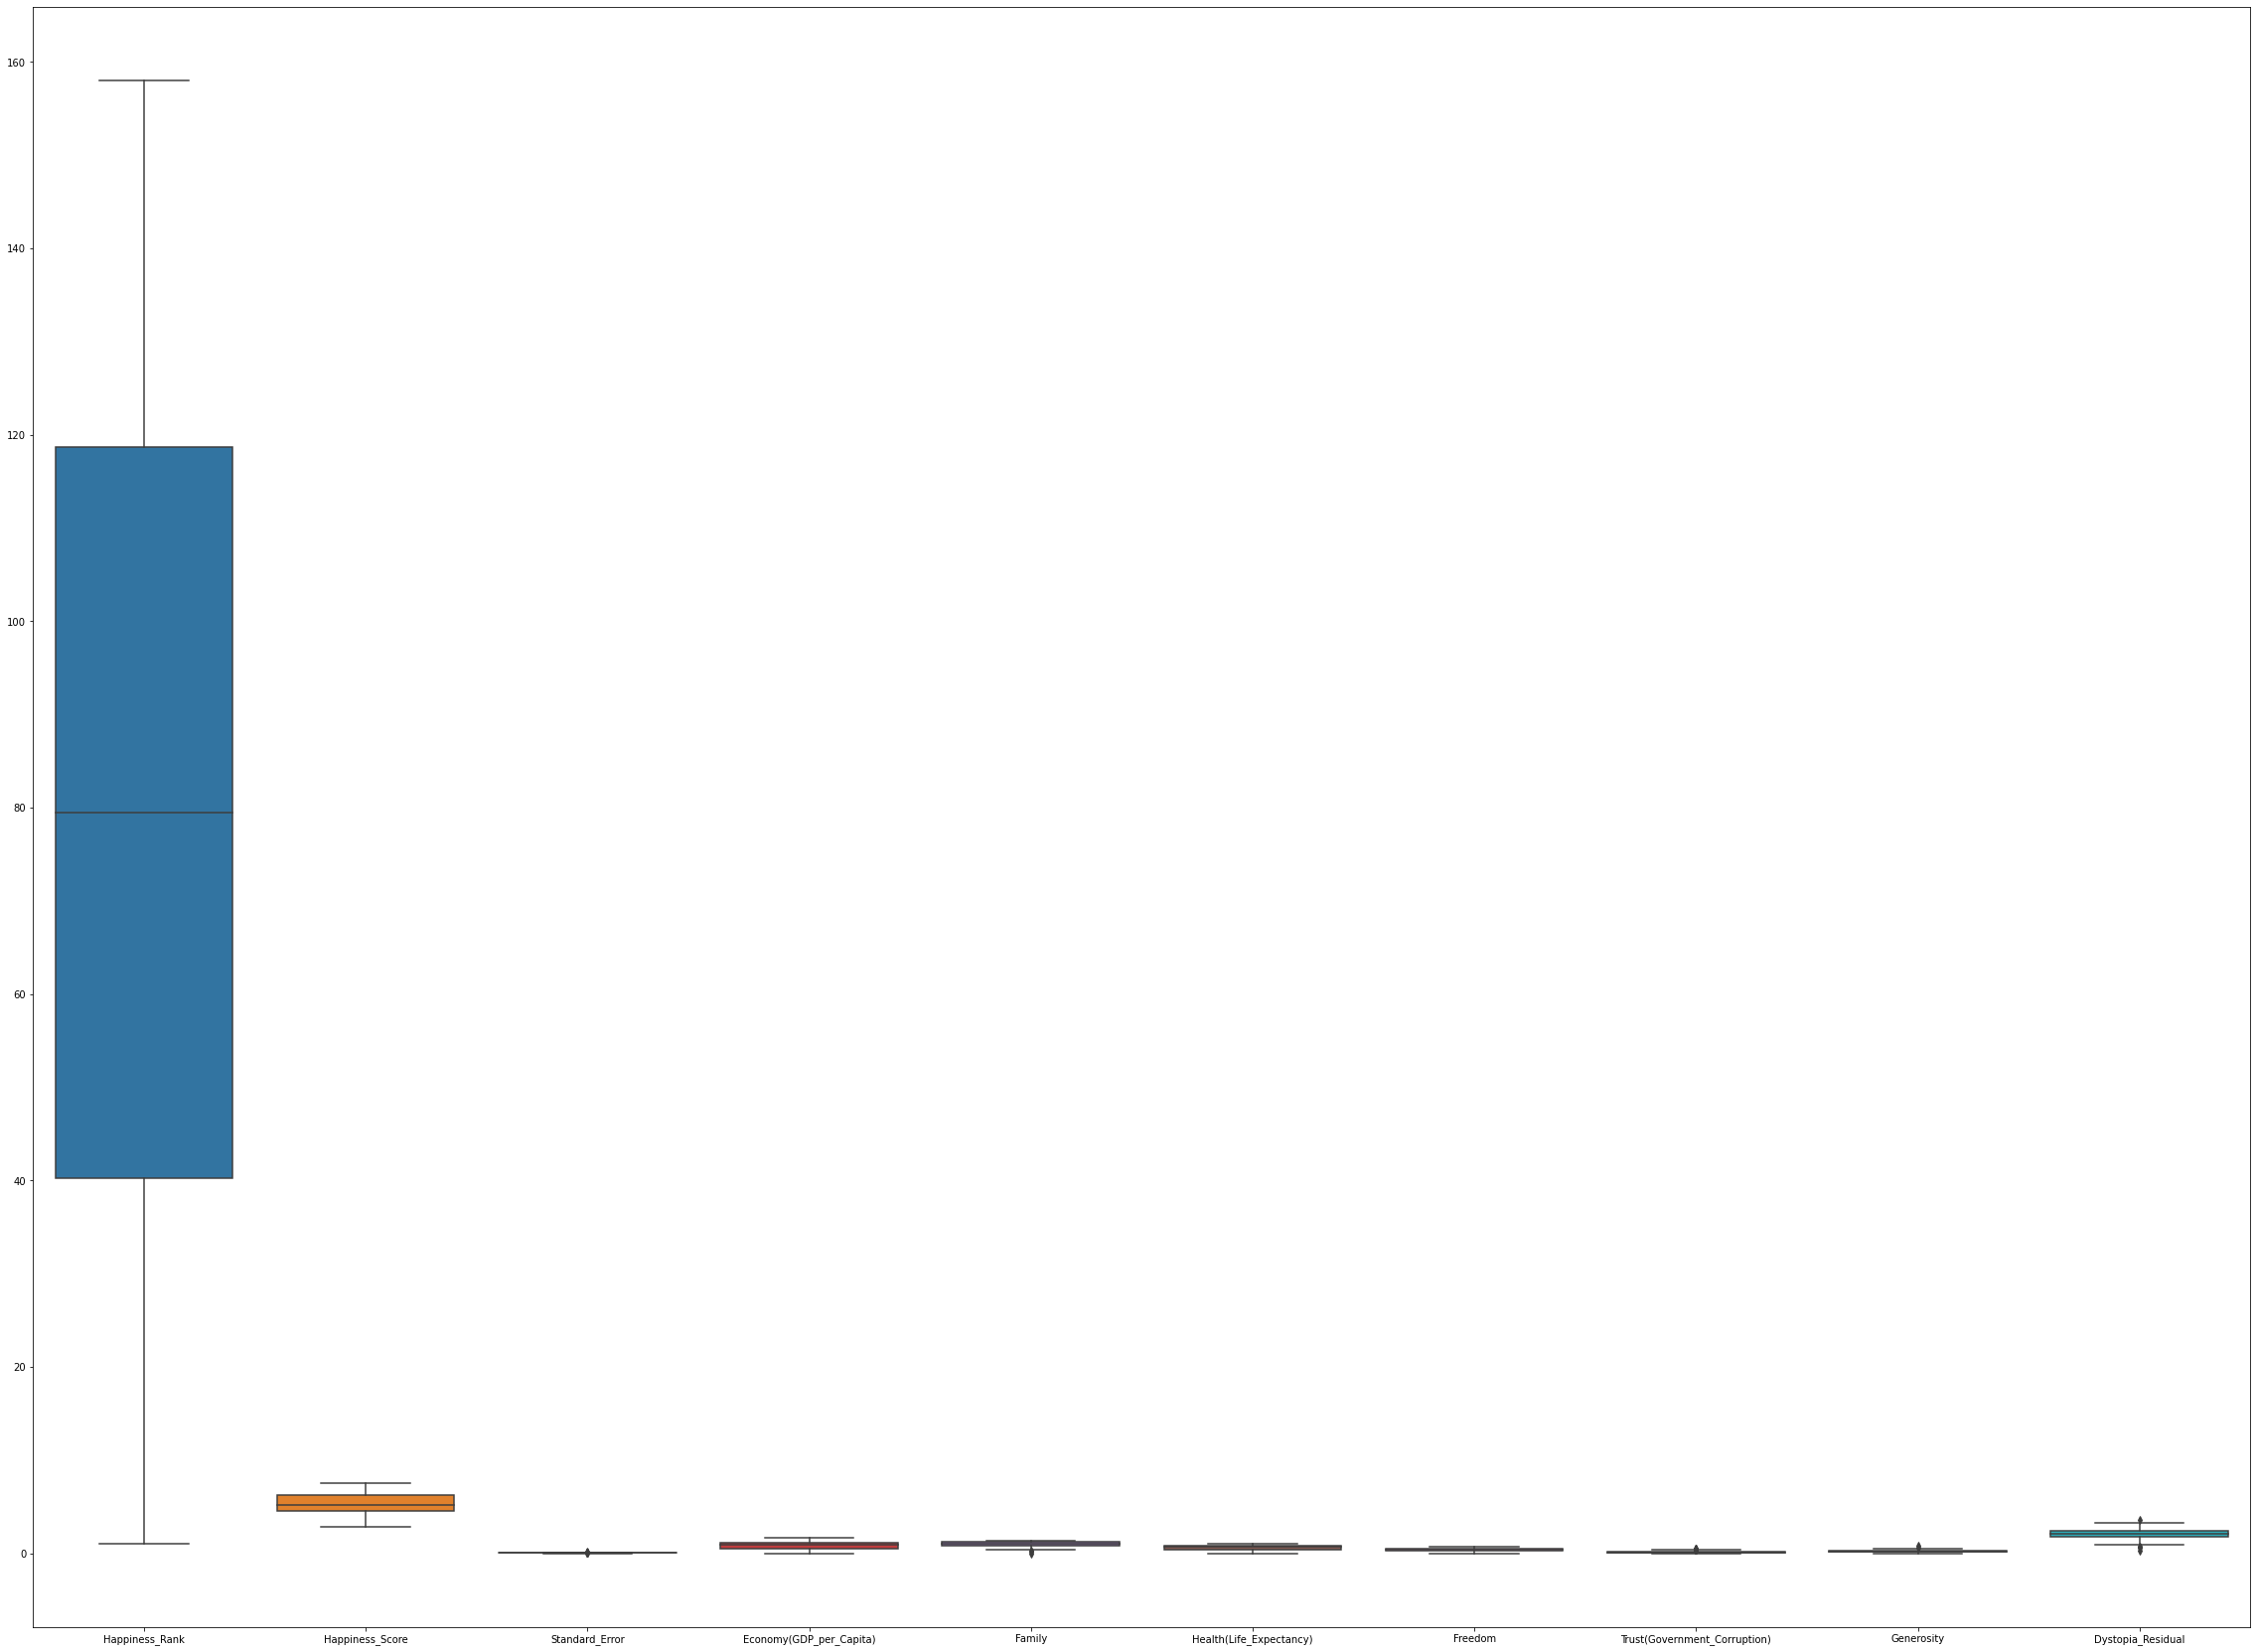

In [12]:
#boxplot to check outliers
plt.figure(figsize = (40,30))
ax = sns.boxplot(data = happiness)

In [13]:
corr_matrix = happiness.corr()
corr_matrix

,Happiness_Rank,Happiness_Score,Standard_Error,Economy(GDP_per_Capita),Family,Health(Life_Expectancy),Freedom,Trust(Government_Corruption),Generosity,Dystopia_Residual
Happiness_Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness_Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard_Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy(GDP_per_Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health(Life_Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust(Government_Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia_Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


<AxesSubplot:>

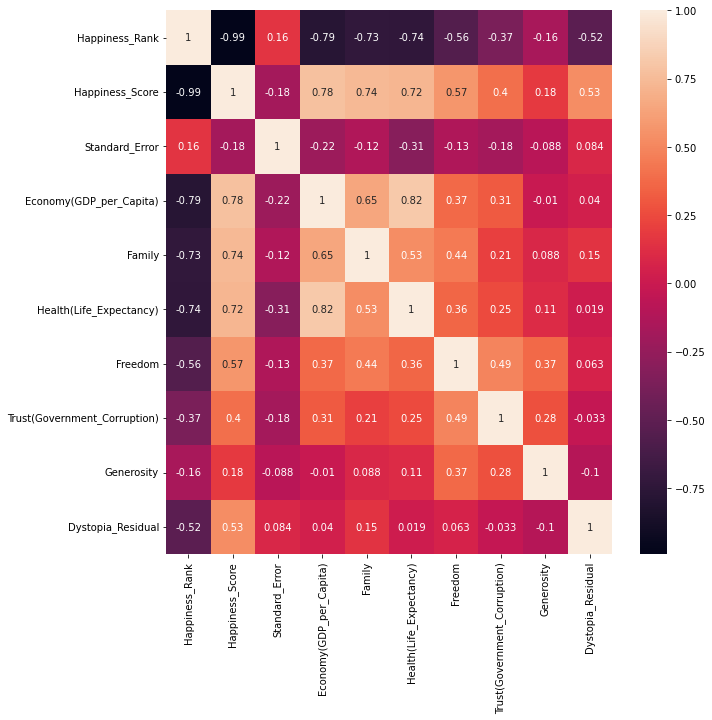

In [14]:
plt.figure(figsize = (10,10))
sns.heatmap(corr_matrix,annot = True)

In [15]:
# Drop all categorical features
cat_fea = ['Country','Region','Happiness_Rank']
happiness.drop(cat_fea,axis=1,inplace=True)
happiness.head()

,Happiness_Score,Standard_Error,Economy(GDP_per_Capita),Family,Health(Life_Expectancy),Freedom,Trust(Government_Corruption),Generosity,Dystopia_Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [16]:
#splitting the data into independent and dependent datasets
x = happiness.drop(['Happiness_Score'],axis = 1)
y = happiness['Happiness_Score']

In [17]:
#testing to accpect null hypothsis or not
normaltest(happiness.Happiness_Score.values)

NormaltestResult(statistic=10.166540875747726, pvalue=0.006199600417031703)

model making

In [18]:
#spliting dataset into training(70%) and testing(30%)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=45)

In [19]:
models=[SVR(),DecisionTreeRegressor(),LinearRegression(),
        RandomForestRegressor()]

In [20]:
maelist=[]
mselist=[]
rmselist=[]
r2list=[]
def create_model(model):
    m=model
    m.fit(xtrain,ytrain)
    p=m.predict(xtest)
    
    mae=mean_absolute_error(p,ytest)
    mse=mean_squared_error(p,ytest)
    rmse=np.sqrt(mean_squared_error(p,ytest))
    r2=r2_score(ytest,p)
    
    maelist.append(mae)
    mselist.append(mse)
    rmselist.append(rmse)
    r2list.append(r2)
    
    print(m)
    print('Mean absolute error',mae)
    print('Mean squared error',mse)
    print('Root Mean squared error',rmse)
    print('R2 Score',r2)
    print('---------------------------------------------------------------------------------------------------------')

In [22]:
for i in models:
    create_model(i)

SVR()
Mean absolute error 0.08526933387736398
Mean squared error 0.01788321975736999
Root Mean squared error 0.1337281561877303
R2 Score 0.986886434323886
---------------------------------------------------------------------------------------------------------
DecisionTreeRegressor()
Mean absolute error 0.5036041666666665
Mean squared error 0.4221988125
Root Mean squared error 0.6497682760030686
R2 Score 0.6904063176982217
---------------------------------------------------------------------------------------------------------
LinearRegression()
Mean absolute error 0.0002519665138275562
Mean squared error 8.677476639981503e-08
Root Mean squared error 0.0002945755699303916
R2 Score 0.9999999363690312
---------------------------------------------------------------------------------------------------------
RandomForestRegressor()
Mean absolute error 0.30517937499999975
Mean squared error 0.16422235573958313
Root Mean squared error 0.4052435758153152
R2 Score 0.8795775773772692
-----------

saving the model

In [23]:
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [24]:
import joblib
joblib.dump(model,'Happinessmodel.pkl')

['Happinessmodel.pkl']